# **Let's Grow More - Data Science Internship**
**Task-3 : Prediction using Decision Tree Algorithm**

# **Description:**

Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

**Dataset-Link:** https://archive.ics.uci.edu/ml/datasets/Iris

**Building-up Iris Dataset**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('IRIS.csv')

# **Dataset information**

In [ ]:
df

In [ ]:
print(df.head())
print(df.tail())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [ ]:
df.info() # datatypes and null_value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape # Rows & Columns

(150, 5)

**Species of Iris Flower**
*   Setosa
*   Versicolor
*   Virginica

**Attributes of Iris Flower**
*   Sepal Length
*   Sepal Width
*   Petal Length
*   Petal Width

#  **Null Values in our Dataset**

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#  **Describing our Dataset**

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#  **Distribution of Iris Flower Species in Dataset**

In [ ]:
df.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

#  **Visualizing the dataset using Matplotlib & Seaborn**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Countplot to show species of iris flower**

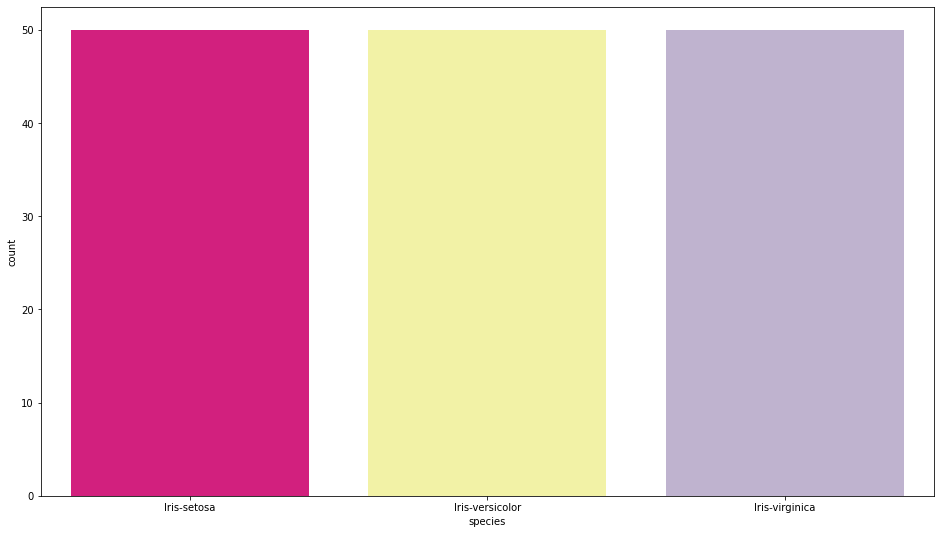

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x=df.species, data=df, palette='Accent_r')
plt.show()

## **Let's find correlation of our dataset**

Correlation is of 2 types:

1.   Positive Correlation
2.   Negative Correlation

In [ ]:
correlation = df.corr()

# **Correlation using Heatmap**

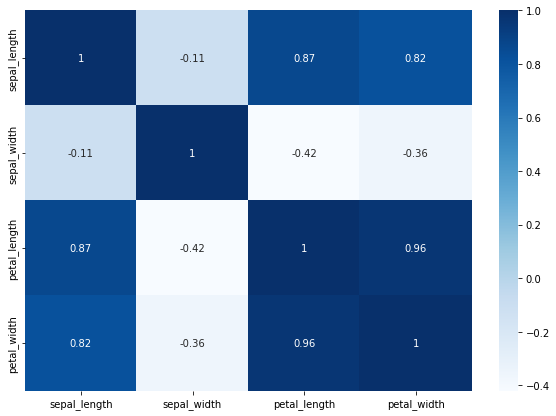

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.show()

# **Exploratory Data Analysis (EDA):**

**Relation Between Species & Attributes using Barplot**

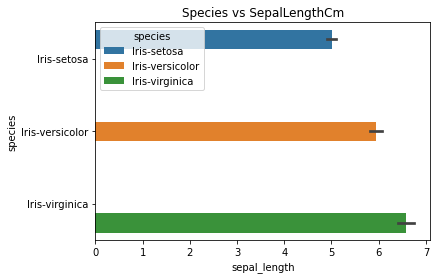

In [ ]:
plt.title('Species vs SepalLengthCm')
sns.barplot(data= df, x = 'sepal_length', y= 'species', hue = 'species')

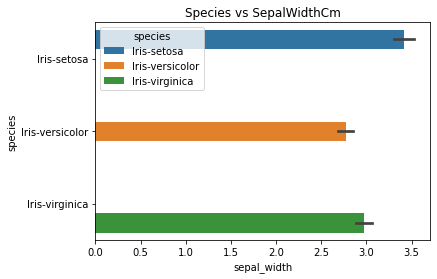

In [ ]:
plt.title('Species vs SepalWidthCm')
sns.barplot(data= df, x = 'sepal_width', y= 'species', hue = 'species')

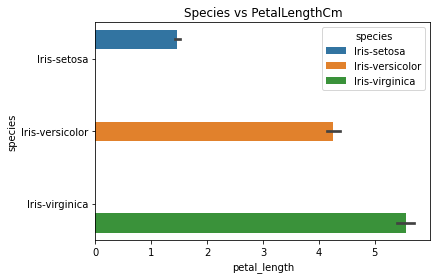

In [ ]:
plt.title('Species vs PetalLengthCm')
sns.barplot(data= df, x = 'petal_length', y= 'species', hue = 'species')

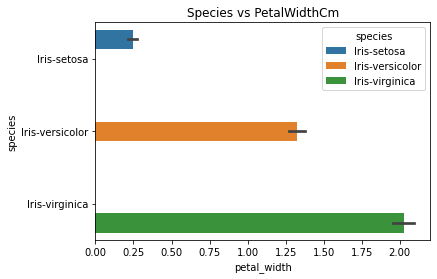

In [ ]:
plt.title('Species vs PetalWidthCm')
sns.barplot(data= df, x = 'petal_width', y= 'species', hue = 'species')

# **Now we will plot a Pairplot**

It shows pairwise relationship of the dataset;

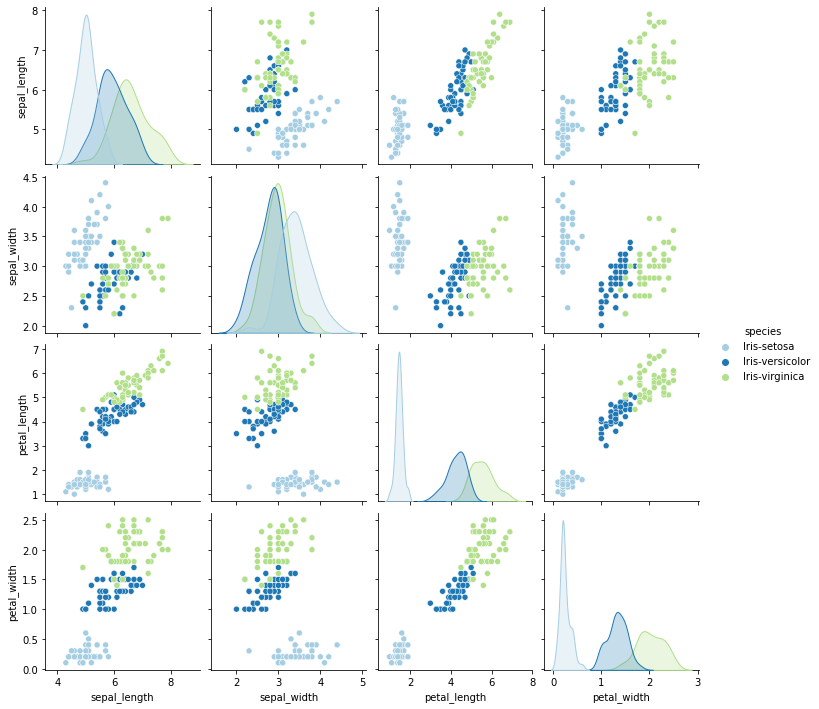

In [ ]:
sns.pairplot(df, hue='species', palette='Paired')
plt.show()

# **Label Encoding**

Converting Categorical Data to Numerical Data

**Species in Iris Flower Dataset has three types:**
*   Setosa
*   Versicolor
*   Virginica

So, we will convert:

> Setosa to 0

> Versicolor to 1

> Virginica to 2

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [ ]:
print(df.head())
print(df.tail())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
     sepal_length  sepal_width  petal_length  petal_width  species
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2


# **Seperate Iris Flower's Attributes with Species**

In [ ]:
x = df.drop(['species'], axis=1) # Independent variables
y = df['species'] # Dependent or Target variable (Iris-Species) 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(150, 4) (120, 4) (30, 4)
(150,) (120,) (30,)


# **Let's Train a Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# **Accuracy of our Model**

We need to import Sklearn's Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

# **Accuracy of x_train against y_train**

In [ ]:
x_train_pred = model.predict(x_train)
x_train_score = accuracy_score(y_train, x_train_pred)
print('Accuracy of x_train against y_train: ',x_train_score)

Accuracy of x_train against y_train:  1.0


# **Accuracy of x_test against y_test**

In [ ]:
x_test_pred = model.predict(x_test)
x_test_score = accuracy_score(y_test, x_test_pred)
print('Accuracy of x_test against y_test: ',x_test_score)

Accuracy of x_test against y_test:  0.9666666666666667


# **Tree Visualization**

In [ ]:
from sklearn import tree

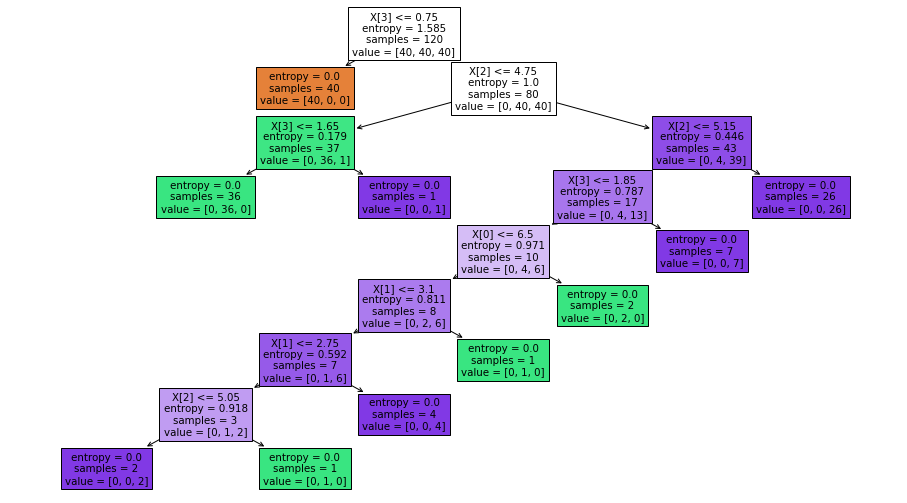

In [ ]:
plt.figure(figsize=(16,9))
tree.plot_tree(model,filled=True)
plt.show()

# **Thank you!!!**